# Tutorial 1

Esse tutorial tem como objetivo explorar os conceitos básicos do Tensorflow. Detalhes de como instalar o TensorFlow podem ser encontrados em: https://www.tensorflow.org/. 

Links de referência para esse material:

* [Tutorial do Tensorflow](https://www.tensorflow.org/get_started/mnist/beginners)
* [Curso básico do Tensorflow](https://drive.google.com/drive/mobile/folders/0B41Zbb4c8HVyMHlSQlVFWWphNXc)
* [TensorFlow Examples](https://github.com/aymericdamien/TensorFlow-Examples)

O código a seguir verifica se o tensorflow foi instalado e exibe a versão atual

In [1]:
import tensorflow as tf
tf.__version__

'1.0.0'

 Para entender um pouco do funcionamento do tensorflow, vamos criar a "rede" a seguir: 
 
 <img src="http://adolfo.data2learning.com/ludiico/images/diagrama1.png" />

In [3]:
#Criando os nós:

node1 = tf.constant(3.0, tf.float32) #Cria o nó "a" com o valor 3 do tipo float
node2 = tf.constant(4.0) # Cria o nó "b" com o valor 4 (implicitamente ele também é do tipo float)
node3 = tf.add(node1, node2) # Cria o nó raiz aplicando as operações de soma nos nós a e b

In [4]:
print("node1:", node1, "node2:", node2)
print("node3:", node3)

node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


In [6]:
#Vamos criar uma seção do TensorFlow para executar as operações necessárias:

sess = tf.Session()
sess.run(node3)

7.0

O workflow de trabalho com o tensorflow pode ser dividio em 3 partes:
 
* Construção do grafo utilizando as operações do Tensorflow **In[3]**
* Alimentar com os dados e executar as operações do grafo (*sess.run(op)*) **In[6]**
* Atualizar as variáveis do grafo (e retornar os valores de saída) **In[6]**

Na primeira solução, criamos o grafo já com os valores pré-definidos. No entanto, é interessante que esses valores sejam alimentados com os valore de entrada. Para isso, vamos criar os **placeholder**. Detalhes sobre **feed** e **placeholder** podem ser encontrados em: https://www.tensorflow.org/programmers_guide/reading_data#feeding

In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b # esse comando tem a mesma função de tf.add(node1, node2) do exemplo anterior

print(sess.run(adder_node, feed_dict={a: 3, b: 4}))

7.0


In [8]:
print(sess.run(adder_node, feed_dict={a: [1, 3], b:[2, 4]}))

[ 3.  7.]


Um outro conceito básico importante é o conceito de **Variáveis** no Tensorflow. Quando criamos um modelo, as veriáveis são utilizadas para manter e atualizar os parâmetros deste modelo. Detalhes sobre variáveis podem ser encontrados em: https://www.tensorflow.org/programmers_guide/variables

O exemplo a seguir, mostra brevemente como seria o uso de váriaveis no código. 

In [20]:
# Cria as variáveis 

weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35), name="weights")
biases = tf.Variable(tf.zeros([200]), name="biases")

# Adiciona um operação que inicializa as variáveis que serão utilizadas no modelo 
init_op = tf.global_variables_initializer()

# Quando for rodar o modelo, executa a inicialização das operações

with tf.Session() as sess:
    sess.run(init_op)
    # ... 
    # Use the model 
    # ...

Outro conceito importante é o conceito de **Tensor**. No tensorflow tudo é Tensor (*Everything is Tensor*). Você pode imaginar o **Tensor** como sendo um array n-dimensional ou uma lista. Um tensor possui um tipo estático e a dimensão é determinada de forma dinâmica. Uma observação importante é que apenas *tensors* podem ser passados entre os nós de um grafo no tensorflow. Dealhes podem ser encontrados em: https://www.tensorflow.org/programmers_guide/dims_types

Para ilustrar esses componentes, vamos trabalhar com o modelo. O próposito é criar o modelo de regressão linear utilizando o tensorflow. Para treinar valos utilizar os seguinte modelo: 

* Hypothesis

$H(x) = Wx + b$

* Const function

$cost(W, b) = \frac{1}{m}\sum_{i=1}^{m}(H(x^{(i)})-y^{(i)})^2$

* Gradient descent algorithm

In [21]:
# Cosntruindo o grafo utilizando operações do Tensorflow

# Dados de entrada

x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Criando a operação da Hypothesis

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# XW + b

hypothesis = x_train * W + b

In [22]:
# cost function

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [23]:
# Gradient Descent

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

Uma vez que o modelo foi criado, o próximo passo é o de executar e atualizar o grafo e pegar o resultado final. 

In [24]:
# Criar a sessão do grafo

sess = tf.Session()

# Inicializa as variáveis no grafo
sess.run(tf.global_variables_initializer())

#Treinamento

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 5.61987 [ 2.10510969] [-0.0180308]
20 0.0739709 [ 1.26462615] [-0.36406687]
40 0.0215752 [ 1.17710483] [-0.37998706]
60 0.0191815 [ 1.16163206] [-0.36527425]
80 0.0174172 [ 1.15335512] [-0.34840718]
100 0.0158185 [ 1.14608335] [-0.33206195]
120 0.0143667 [ 1.13921165] [-0.31645903]
140 0.013048 [ 1.13266873] [-0.30158687]
160 0.0118504 [ 1.12643373] [-0.28741345]
180 0.0107627 [ 1.12049186] [-0.27390623]
200 0.00977492 [ 1.11482918] [-0.26103365]
220 0.00887773 [ 1.1094327] [-0.24876603]
240 0.00806289 [ 1.10428977] [-0.23707497]
260 0.00732284 [ 1.09938848] [-0.22593333]
280 0.00665072 [ 1.0947175] [-0.21531527]
300 0.00604029 [ 1.09026611] [-0.20519622]
320 0.00548589 [ 1.08602405] [-0.19555275]
340 0.00498238 [ 1.08198142] [-0.18636253]
360 0.00452507 [ 1.07812834] [-0.1776042]
380 0.00410975 [ 1.07445669] [-0.16925748]
400 0.00373254 [ 1.07095754] [-0.16130301]
420 0.00338996 [ 1.06762278] [-0.15372241]
440 0.00307881 [ 1.06444478] [-0.14649801]
460 0.00279622 [ 1.06141603] [-0.1

Vamos exibir os dados originais e o modelo treinado. 

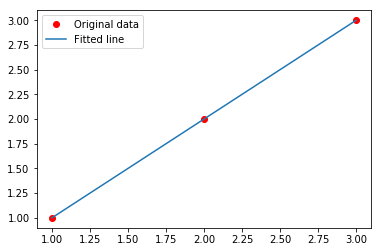

In [28]:
#Graphic display
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Vamos mudar nossa implementação para que use os conceitos de **PlaceHolder** e que a gente possa alimentar nosso modelo com os dados. Nessa etapa vamos utilizar mais dados. As listas a seguir e o gráfico mostram a distribuição dos dados que a gente vai criar. 

    x_train = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1]
    
    y_train = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3]
    


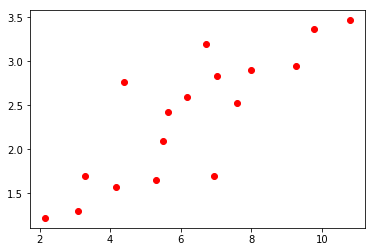

In [36]:
x_train = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]
y_train = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]

plt.plot(x_train, y_train, 'ro', label='Original data')
plt.show()

In [1]:
# Modelo completo utilizando o placeholder

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train, feed_dict={X: x_train, Y: y_train})
    if step % 20 == 0:
        print(step, sess.run(cost, feed_dict={X: x_train, Y: y_train}), 
              sess.run(W), sess.run(b))

NameError: name 'tf' is not defined

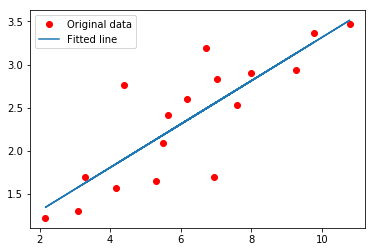

In [42]:
#Graphic display
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
plt.legend()
plt.show()